In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.ensemble import RandomForestClassifier

In [10]:
df=pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [11]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [13]:

df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

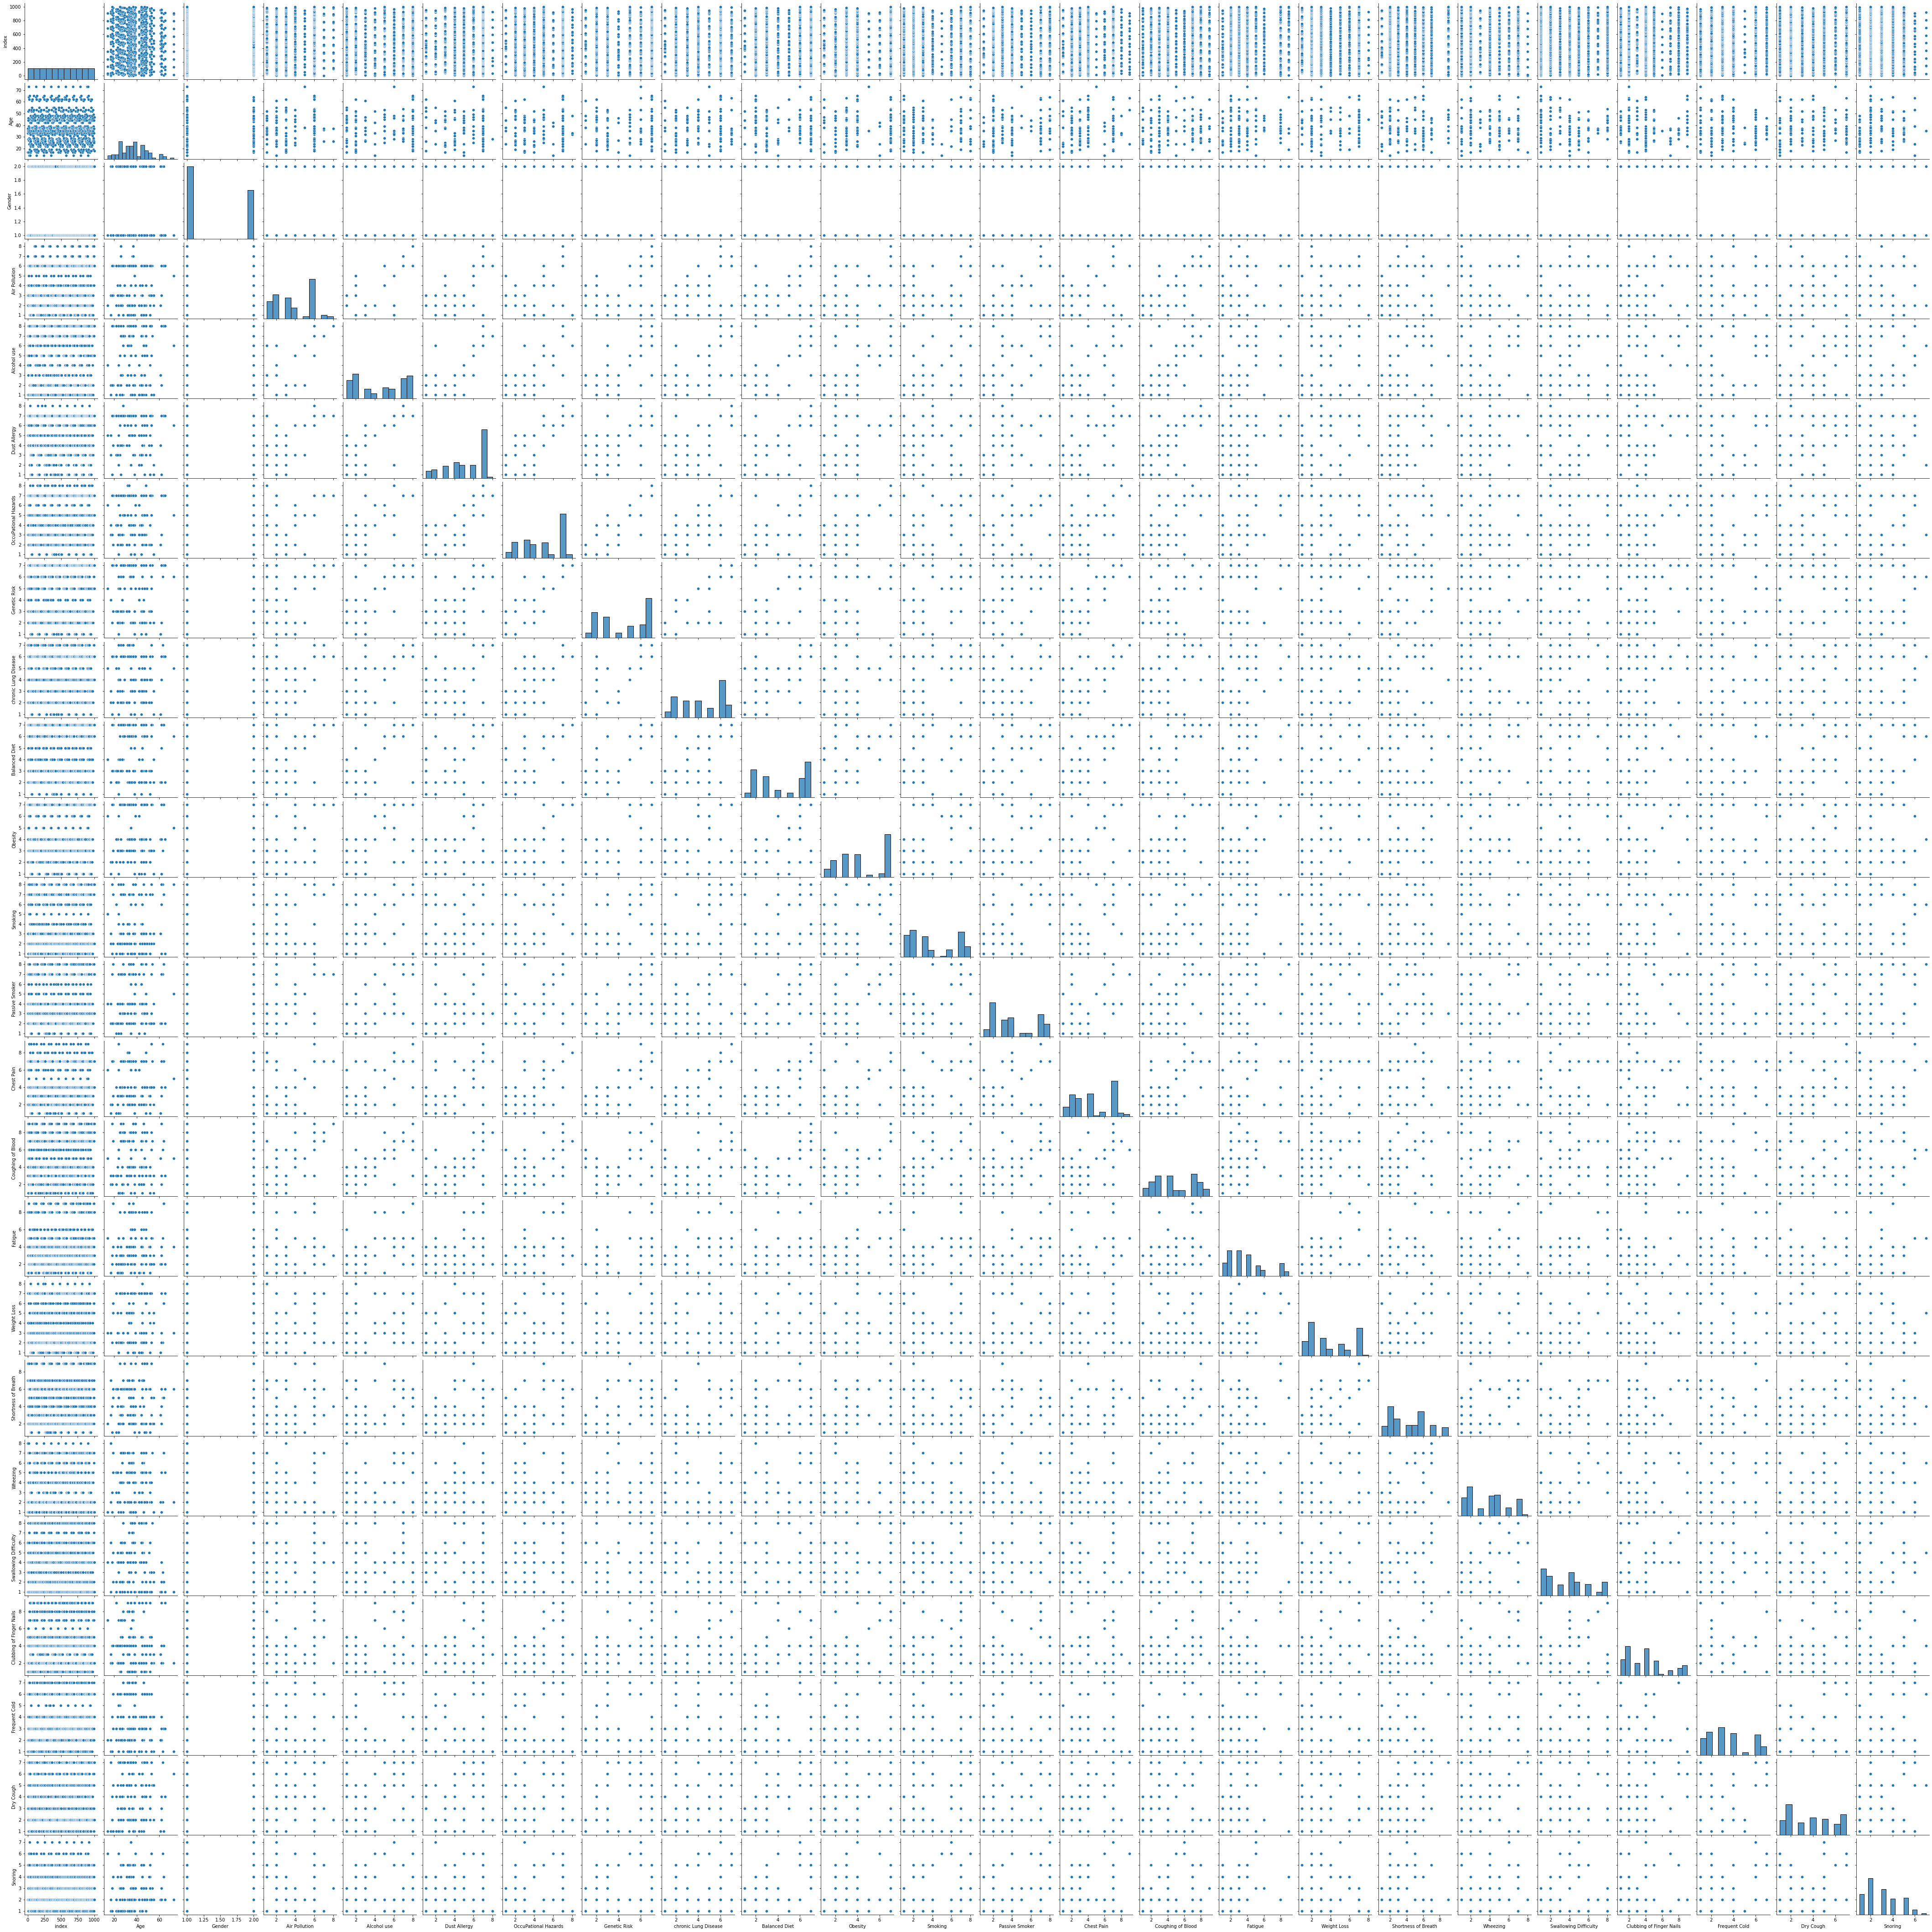

In [14]:
sns.pairplot(data=df)

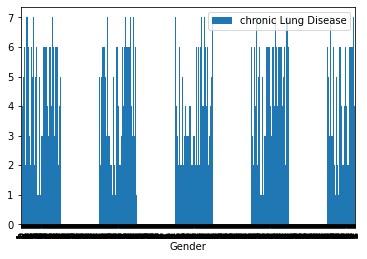

In [15]:
df.plot(kind = "bar" ,x="Gender",y="chronic Lung Disease")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

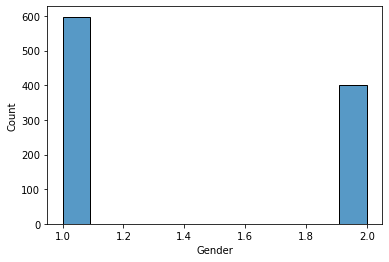

In [16]:
sns.histplot(data=df, x="Gender")

<AxesSubplot:xlabel='chronic Lung Disease', ylabel='Count'>

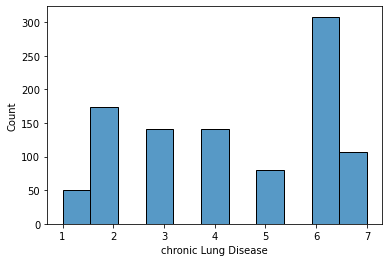

In [17]:
sns.histplot(data=df, x="chronic Lung Disease")

In [18]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [79]:
#independent variables

x= pd.DataFrame(df.iloc[:,[4,5,6,7,8,10,12,13,14,15,16,18,19,20,21,22,23,24]])
x

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,2,4,5,4,3,2,3,2,2,4,3,2,2,3,1,2,3,4
1,3,1,5,3,4,2,2,4,2,3,1,7,8,6,2,1,7,2
2,4,5,6,5,5,6,2,3,4,8,8,9,2,1,4,6,7,2
3,7,7,7,7,6,7,7,7,7,8,4,3,1,4,5,6,7,5
4,6,8,7,7,7,7,8,7,7,9,3,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,7,7,8,7,7,5,2,7,8,2,4,5,3
996,6,8,7,7,7,7,7,8,7,7,9,5,7,2,4,3,1,4
997,4,5,6,5,5,6,2,3,4,8,8,9,2,1,4,6,7,2
998,6,8,7,7,7,7,8,7,7,9,3,4,1,4,2,4,2,3


In [20]:
y= df.iloc[:,-17]
y

0      2
1      2
2      4
3      7
4      6
      ..
995    6
996    6
997    4
998    6
999    4
Name: chronic Lung Disease, Length: 1000, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
x_train,x_test,y_train,y_test

(     Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
 600              2            1             2                     3   
 80               1            2             3                     4   
 158              1            3             2                     4   
 423              2            3             2                     1   
 747              6            8             7                     7   
 ..             ...          ...           ...                   ...   
 579              3            2             4                     2   
 502              2            3             2                     1   
 537              6            8             7                     7   
 196              1            2             3                     4   
 175              6            8             7                     7   
 
      Genetic Risk  Balanced Diet  Smoking  Passive Smoker  Chest Pain  \
 600             4              2        1               1  

In [22]:
#created on instance of the standardscaler class called ss
SS= StandardScaler()

In [110]:
#transformed both traning and test datasets
x_train= SS.fit_transform(x_train)
x_test= SS.transform(x_test)

# LogisticRegression

In [111]:

LR=LogisticRegression()
LR

LogisticRegression()

In [112]:
LR.fit(x_train,y_train)

C:\Users\new user 1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
y_pred=LR.predict(x_test)
y_pred

array([7, 6, 2, 4, 2, 3, 2, 3, 2, 3, 1, 6, 3, 7, 6, 5, 7, 6, 2, 6, 5, 7,
       6, 6, 7, 6, 3, 6, 6, 2, 6, 5, 1, 6, 3, 4, 2, 2, 6, 3, 5, 6, 4, 6,
       2, 2, 3, 6, 6, 6, 4, 2, 3, 4, 4, 2, 1, 4, 4, 6, 2, 6, 5, 7, 4, 4,
       3, 6, 6, 4, 3, 6, 6, 6, 7, 5, 5, 5, 3, 4, 5, 4, 1, 6, 4, 2, 2, 3,
       1, 6, 5, 1, 6, 3, 3, 2, 3, 6, 3, 6, 5, 7, 3, 2, 7, 6, 4, 4, 4, 6,
       6, 6, 6, 6, 2, 1, 4, 2, 3, 2, 6, 2, 6, 2, 4, 6, 5, 1, 3, 1, 3, 3,
       2, 6, 6, 2, 6, 5, 4, 4, 3, 4, 2, 2, 5, 7, 3, 3, 3, 3, 2, 6, 4, 7,
       6, 4, 1, 2, 3, 5, 6, 6, 6, 6, 5, 3, 6, 3, 7, 4, 4, 7, 3, 2, 4, 4,
       7, 6, 4, 2, 4, 4, 6, 6, 7, 3, 3, 2, 6, 6, 6, 5, 4, 4, 6, 3, 5, 6,
       6, 5, 4, 5, 6, 2, 3, 3, 7, 3, 6, 1, 2, 2, 7, 2, 3, 6, 6, 3, 3, 6,
       6, 7, 2, 5, 2, 3, 2, 2, 7, 4, 3, 6, 6, 7, 3, 6, 2, 6, 2, 4, 7, 3,
       6, 5, 6, 7, 6, 4, 3, 2, 5, 4, 4, 6, 3, 3, 6, 4, 6, 7, 5, 1, 6, 2,
       2, 6, 6, 2, 3, 3, 3, 6, 1, 3, 4, 6, 4, 4, 6, 1, 6, 6, 5, 4, 6, 5,
       3, 6, 3, 4, 6, 4, 4, 3, 3, 5, 6, 4, 6, 6], d

In [114]:
y_test

993    7
859    6
298    2
553    4
672    2
      ..
167    5
998    6
984    4
491    6
10     6
Name: chronic Lung Disease, Length: 300, dtype: int64

In [115]:
#claculate accuracy
auc=print("Accuracy score:",accuracy_score(y_pred,y_test))
auc

Accuracy score: 0.9933333333333333


In [116]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:99.33%


In [117]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0],
       [ 0,  2, 53,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  0,  0,  0, 23]], dtype=int64)

<AxesSubplot:>

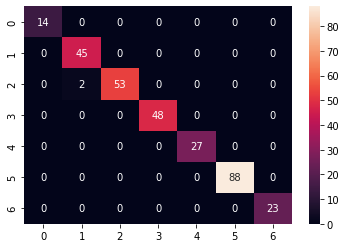

In [118]:
sns.heatmap(cm,annot=True)

In [119]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.96      1.00      0.98        45
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        23

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# KNN model

In [32]:

#model training
#initialize KNN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#fit model with training data
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [101]:
#prediction 
y_pred = knn_model.predict(x_test)
y_pred

array([7, 6, 2, 4, 2, 3, 2, 3, 2, 3, 1, 6, 3, 7, 6, 5, 7, 6, 2, 6, 5, 7,
       6, 6, 7, 6, 3, 6, 6, 2, 6, 5, 1, 6, 3, 4, 2, 2, 6, 3, 5, 6, 4, 6,
       2, 2, 2, 6, 6, 6, 4, 2, 3, 4, 4, 2, 1, 4, 4, 6, 2, 6, 5, 7, 4, 4,
       2, 6, 6, 4, 3, 6, 6, 6, 7, 5, 5, 5, 3, 4, 5, 4, 1, 6, 4, 2, 2, 3,
       1, 6, 5, 1, 6, 3, 3, 2, 3, 6, 3, 6, 5, 7, 3, 2, 7, 6, 4, 4, 4, 6,
       6, 6, 6, 6, 2, 1, 4, 2, 3, 2, 6, 2, 6, 2, 4, 6, 5, 1, 3, 1, 3, 3,
       2, 6, 6, 2, 6, 5, 4, 4, 3, 4, 2, 2, 5, 7, 3, 3, 3, 3, 2, 6, 4, 7,
       6, 4, 1, 2, 3, 5, 6, 6, 6, 6, 5, 3, 6, 3, 7, 4, 4, 7, 3, 2, 4, 4,
       7, 6, 4, 2, 4, 4, 6, 6, 7, 3, 3, 2, 6, 6, 6, 5, 4, 4, 6, 3, 5, 6,
       6, 5, 4, 5, 6, 2, 3, 3, 7, 3, 6, 1, 2, 2, 7, 2, 3, 6, 6, 3, 3, 6,
       6, 7, 2, 5, 2, 3, 2, 2, 7, 4, 3, 6, 6, 7, 3, 6, 2, 6, 2, 4, 7, 3,
       6, 5, 6, 7, 6, 4, 3, 2, 5, 4, 4, 6, 3, 3, 6, 4, 6, 7, 5, 1, 6, 2,
       2, 6, 6, 2, 3, 3, 3, 6, 1, 3, 4, 6, 4, 4, 6, 1, 6, 6, 5, 4, 6, 5,
       3, 6, 3, 4, 6, 4, 4, 3, 3, 5, 6, 4, 6, 6], d

In [102]:
y_test

993    7
859    6
298    2
553    4
672    2
      ..
167    5
998    6
984    4
491    6
10     6
Name: chronic Lung Disease, Length: 300, dtype: int64

In [103]:
#claculate accuracy
auc=print("Accuracy score:",accuracy_score(y_pred,y_test))
auc

Accuracy score: 1.0


In [104]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:100.00%


In [105]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [106]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        23

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<AxesSubplot:>

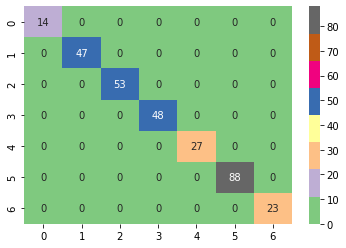

In [107]:
sns.heatmap(cm,annot=True,cmap="Accent")

# svc


In [127]:
classifier = SVC(kernel = "linear")
classifier

SVC(kernel='linear')

In [128]:
y_test

993    7
859    6
298    2
553    4
672    2
      ..
167    5
998    6
984    4
491    6
10     6
Name: chronic Lung Disease, Length: 300, dtype: int64

In [129]:
print(accuracy_score(y_pred,y_test))

0.9933333333333333


In [130]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:99.33%


In [131]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0],
       [ 0,  2, 53,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  0,  0,  0, 23]], dtype=int64)

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.96      0.98        47
           3       0.96      1.00      0.98        53
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        23

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<AxesSubplot:>

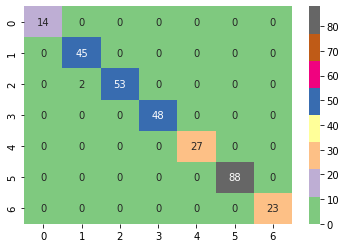

In [136]:
sns.heatmap(cm,annot=True,cmap="Accent")

#  DecisionTree


In [153]:
cols=["Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","Balanced Diet","Smoking","Passive Smoker","Chest Pain","Coughing of Blood","Fatigue","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring"]
x=df[cols]
y=df.iloc[:,-17]
y


0      2
1      2
2      4
3      7
4      6
      ..
995    6
996    6
997    4
998    6
999    4
Name: chronic Lung Disease, Length: 1000, dtype: int64

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [155]:
SS= StandardScaler()
x_train= SS.fit_transform(x_train)
x_test= SS.transform(x_test)

In [156]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [157]:
y_pred=classifier.predict(x_test)
y_pred

array([7, 6, 4, 4, 3, 3, 4, 3, 4, 3, 3, 6, 3, 7, 6, 3, 7, 6, 3, 6, 3, 6,
       6, 7, 7, 6, 3, 6, 6, 3, 6, 3, 3, 6, 3, 4, 4, 3, 4, 3, 3, 6, 4, 6,
       4, 3, 3, 4, 6, 6, 4, 4, 3, 4, 4, 4, 3, 4, 4, 6, 3, 6, 3, 7, 4, 4,
       3, 6, 4, 4, 3, 6, 6, 6, 6, 3, 3, 3, 3, 4, 3, 4, 3, 6, 4, 4, 3, 3,
       3, 6, 3, 3, 6, 3, 3, 3, 3, 6, 3, 7, 3, 7, 3, 3, 7, 6, 4, 4, 4, 6,
       6, 7, 6, 6, 3, 3, 4, 4, 3, 4, 6, 3, 6, 3, 3, 6, 3, 3, 4, 3, 4, 3,
       3, 3, 6, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 7, 4, 4, 3, 3, 4, 4, 4, 7,
       6, 4, 3, 4, 3, 3, 6, 6, 6, 6, 3, 3, 6, 3, 7, 4, 4, 7, 3, 4, 4, 4,
       7, 6, 4, 3, 4, 4, 6, 6, 7, 3, 4, 3, 6, 6, 6, 3, 4, 4, 6, 3, 3, 6,
       6, 3, 4, 3, 6, 3, 3, 3, 6, 3, 6, 3, 4, 4, 6, 3, 3, 6, 3, 3, 3, 4,
       7, 6, 4, 3, 4, 3, 4, 4, 7, 4, 3, 6, 6, 7, 4, 6, 3, 6, 4, 4, 7, 3,
       7, 3, 6, 7, 6, 4, 3, 4, 3, 4, 4, 6, 3, 3, 6, 4, 6, 6, 3, 3, 6, 4,
       3, 3, 7, 4, 3, 3, 3, 6, 3, 4, 4, 6, 4, 4, 6, 3, 6, 6, 3, 4, 6, 3,
       3, 6, 3, 4, 6, 4, 4, 3, 3, 3, 6, 4, 3, 6], d

In [158]:
y_test

993    7
859    6
298    2
553    4
672    2
      ..
167    5
998    6
984    4
491    6
10     6
Name: chronic Lung Disease, Length: 300, dtype: int64

In [159]:
print(accuracy_score(y_pred,y_test))

0.6033333333333334


In [160]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:60.33%


In [161]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.87      0.40      0.55       115
           4       0.96      0.55      0.70        84
           5       0.00      0.00      0.00         0
           6       0.82      0.92      0.87        78
           7       0.74      0.74      0.74        23

    accuracy                           0.60       300
   macro avg       0.48      0.37      0.41       300
weighted avg       0.87      0.60      0.69       300



C:\Users\new user 1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new user 1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\new user 1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


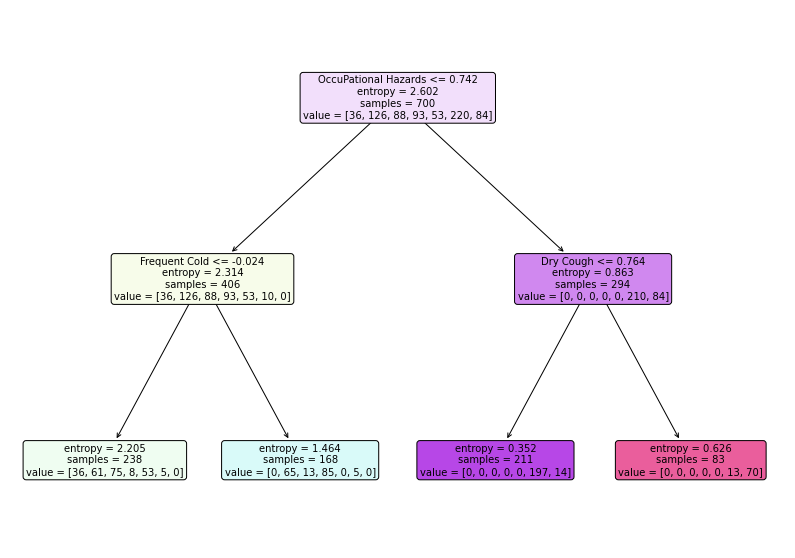

In [162]:
tree_text=export_text(classifier,feature_names=cols)
plt.figure(figsize=(14,10))
plot_tree(classifier,filled=True,rounded=True,feature_names=cols)
plt.show()

# RandomForest

In [177]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [178]:
y_pred=classifier.predict(x_test)

In [179]:
y_pred

array([7, 6, 2, 4, 2, 3, 2, 3, 2, 3, 1, 6, 3, 7, 6, 5, 7, 6, 2, 6, 5, 7,
       6, 6, 7, 6, 3, 6, 6, 2, 6, 5, 1, 6, 3, 4, 2, 2, 6, 3, 5, 6, 4, 6,
       2, 2, 2, 6, 6, 6, 4, 2, 3, 4, 4, 2, 1, 4, 4, 6, 2, 6, 5, 7, 4, 4,
       2, 6, 6, 4, 3, 6, 6, 6, 7, 5, 5, 5, 3, 4, 5, 4, 1, 6, 4, 2, 2, 3,
       1, 6, 5, 1, 6, 3, 3, 2, 3, 6, 3, 6, 5, 7, 3, 2, 7, 6, 4, 4, 4, 6,
       6, 6, 6, 6, 2, 1, 4, 2, 3, 2, 6, 2, 6, 2, 4, 6, 5, 1, 3, 1, 3, 3,
       2, 6, 6, 2, 6, 5, 4, 4, 3, 4, 2, 2, 5, 7, 3, 3, 3, 3, 2, 6, 4, 7,
       6, 4, 1, 2, 3, 5, 6, 6, 6, 6, 5, 3, 6, 3, 7, 4, 4, 7, 3, 2, 4, 4,
       7, 6, 4, 2, 4, 4, 6, 6, 7, 3, 3, 2, 6, 6, 6, 5, 4, 4, 6, 3, 5, 6,
       6, 5, 4, 5, 6, 2, 3, 3, 7, 3, 6, 1, 2, 2, 7, 2, 3, 6, 6, 3, 3, 6,
       6, 7, 2, 5, 2, 3, 2, 2, 7, 4, 3, 6, 6, 7, 3, 6, 2, 6, 2, 4, 7, 3,
       6, 5, 6, 7, 6, 4, 3, 2, 5, 4, 4, 6, 3, 3, 6, 4, 6, 7, 5, 1, 6, 2,
       2, 6, 6, 2, 3, 3, 3, 6, 1, 3, 4, 6, 4, 4, 6, 1, 6, 6, 5, 4, 6, 5,
       3, 6, 3, 4, 6, 4, 4, 3, 3, 5, 6, 4, 6, 6], d

In [180]:
y_test

993    7
859    6
298    2
553    4
672    2
      ..
167    5
998    6
984    4
491    6
10     6
Name: chronic Lung Disease, Length: 300, dtype: int64

In [181]:
print(accuracy_score(y_pred,y_test))

1.0


In [182]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy*100:.2f}%")

Model Accuracy:100.00%


In [183]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        23

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



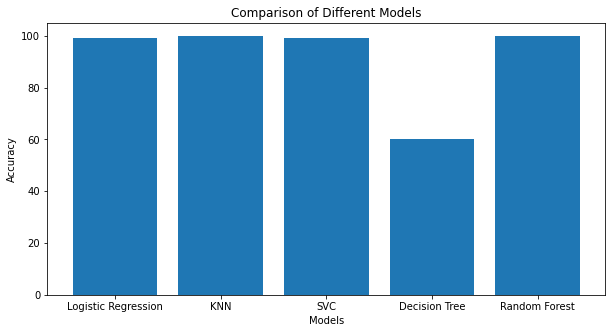

In [4]:
plt.figure(figsize=(10, 5))
plt.title('Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
x = np.array(["Logistic Regression", "KNN", "SVC", "Decision Tree","Random Forest"])
y = np.array([99.3,100,99.3,60.3,100])

plt.bar(x,y)
plt.show()